# XGBoost on the Fashion Dataset

## Imports

In [1]:
# Imports

import xgboost as xgb
import pandas as pd
import seaborn as sbn

from sklearn.model_selection import train_test_split

In [2]:
# Import dataset

train_full = pd.read_csv('./data/fashion-mnist_train.csv')

## Engineerings

In [11]:
# Select the first 10% of dataset for testing
partial = train_full.copy()

# Split dataset into train and val

X_train, X_val = train_test_split(partial, test_size = 0.2, random_state = 42)

# Separate labels from independant variables
target_column = 'label'
Y_train = X_train[target_column]
X_train = X_train.drop(target_column, axis = 1)

Y_val = X_val[target_column]
X_val = X_val.drop(target_column, axis = 1)

print(f"X_train shape : {X_train.shape}")
print(f"Y_train shape : {Y_train.shape}")



X_train shape : (48000, 784)
Y_train shape : (48000,)


## Create model

In [12]:
my_model = xgb.XGBClassifier()

## Train model

In [13]:
my_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Evaluate model

In [6]:
import scikitplot as skplt

In [7]:
# Evaluation on train
Y_train_pred = my_model.predict(X_train)
Y_train_proba = my_model.predict_proba(X_train)

In [8]:
# Evaluation on Val
Y_val_pred = my_model.predict(X_val)
Y_val_proba = my_model.predict_proba(X_val)

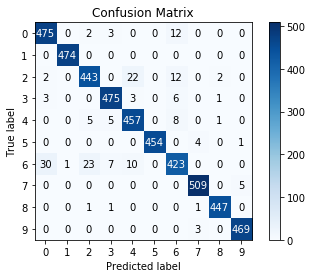

In [9]:
# On train
skplt.metrics.plot_confusion_matrix(Y_train, Y_train_pred)

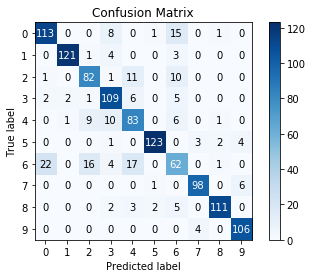

In [10]:
# On val
skplt.metrics.plot_confusion_matrix(Y_val, Y_val_pred)